In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.models import Model
from keras.preprocessing import image

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)

X_train (60000, 28, 28)
X_test (10000, 28, 28)


In [4]:
def pre_process(X):
    X = X/255.0
    X = X.reshape((len(X), 784))
    return X

X_train  =  pre_process(X_train)
X_test  =  pre_process(X_test)

print("X_train", X_train.shape)
print("X_test", X_test.shape)

X_train (60000, 784)
X_test (10000, 784)


In [5]:
def show_data(X, n=10, height=28, width=28, title=""):
    plt.figure(figsize=(10, 3))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(X[i].reshape((height,width)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

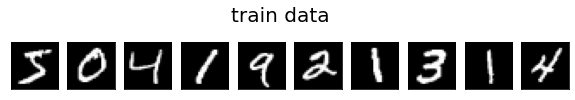

In [7]:
show_data(X_train, title="train data")

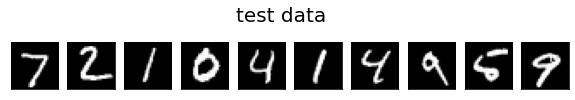

In [8]:
show_data(X_test, title="test data")

In [9]:
input_dim, output_dim = 784, 784
encode_dim = 100
hidden_dim = 256

In [10]:
# encoder
input_layer = Input(shape=(input_dim,), name="INPUT")
hidden_layer_1 = Dense(hidden_dim, activation='relu', name="HIDDEN_1")(input_layer)

# code
code_layer = Dense(encode_dim, activation='relu', name="CODE")(hidden_layer_1)

# decoder
hidden_layer_2 = Dense(hidden_dim, activation='relu', name="HIDDEN_2")(code_layer)
output_layer = Dense(output_dim, activation='sigmoid', name="OUTPUT")(hidden_layer_2)

In [11]:
AE = Model(input_layer, output_layer)
AE.compile(optimizer='adam', loss='binary_crossentropy')
AE.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (InputLayer)          [(None, 784)]             0         
                                                                 
 HIDDEN_1 (Dense)            (None, 256)               200960    
                                                                 
 CODE (Dense)                (None, 100)               25700     
                                                                 
 HIDDEN_2 (Dense)            (None, 256)               25856     
                                                                 
 OUTPUT (Dense)              (None, 784)               201488    
                                                                 
Total params: 454,004
Trainable params: 454,004
Non-trainable params: 0
_________________________________________________________________


In [12]:
AE.fit(X_train, X_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.1127
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0804
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0757
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0735
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0721
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0712
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0705
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0700
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0696
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0693


In [13]:
decoded_data = AE.predict(X_test)

In [14]:
get_encoded_data = Model(inputs=AE.input, outputs=AE.get_layer("CODE").output)

In [15]:
encoded_data = get_encoded_data.predict(X_test)

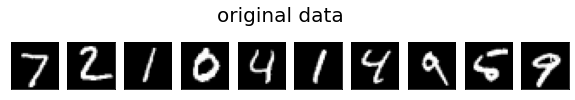

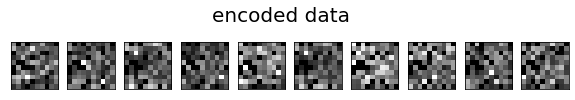

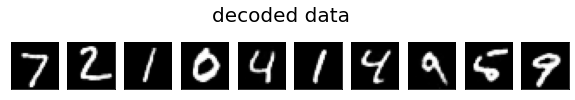

In [16]:
show_data(X_test, title="original data")
show_data(encoded_data, height=10, width=10, title="encoded data")
show_data(decoded_data, title="decoded data")